In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle("diamonds_train.pkl")

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.32,Ideal,H,VVS1,62.7,55.0,692,4.37,4.40,2.75
1,1.26,Good,J,SI1,63.9,58.0,4255,6.78,6.74,4.32
2,0.30,Good,J,SI1,64.0,55.0,439,4.28,4.25,2.73
3,0.41,Ideal,E,VS2,62.5,55.0,935,4.74,4.77,2.97
4,0.71,Very Good,E,VS1,63.3,59.0,2946,5.64,5.67,3.58
...,...,...,...,...,...,...,...,...,...,...
43147,0.33,Premium,G,SI1,59.8,58.0,631,4.54,4.52,2.71
43148,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87
43149,0.26,Ideal,E,VVS2,61.5,56.0,769,4.11,4.08,2.52
43150,0.40,Very Good,G,SI1,62.8,60.0,702,4.66,4.70,2.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [14]:
df['cut'].value_counts() 

4    17097
3    11088
2     9736
1     3928
0     1303
Name: cut, dtype: int64

In [9]:
df.replace({'cut':{'Ideal':4,'Premium':3,"Very Good":2,"Good":1,"Fair":0}}, inplace=True)

In [35]:
df['color'].value_counts() 

6    9014
5    7859
4    7609
3    6653
2    5392
1    4371
0    2254
Name: color, dtype: int64

In [34]:
df.replace({'color':{'G':6,'E':5,"F":4,"H":3,"D":2,"I":1,"J":0}}, inplace=True)

In [36]:
df['clarity'].value_counts() 

7    10485
6     9808
5     7385
4     6518
3     4040
2     2876
1     1426
0      614
Name: clarity, dtype: int64

In [37]:
df.replace({'clarity':{'I1':0,'IF':1,"VVS1":2,"VVS2":3,"VS1":4,"SI2":5,"VS2":6,"SI1":7}}, inplace=True)

In [38]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.32,4,3,2,62.7,55.0,692,4.37,4.40,2.75
1,1.26,1,0,7,63.9,58.0,4255,6.78,6.74,4.32
2,0.30,1,0,7,64.0,55.0,439,4.28,4.25,2.73
3,0.41,4,5,6,62.5,55.0,935,4.74,4.77,2.97
4,0.71,2,5,4,63.3,59.0,2946,5.64,5.67,3.58


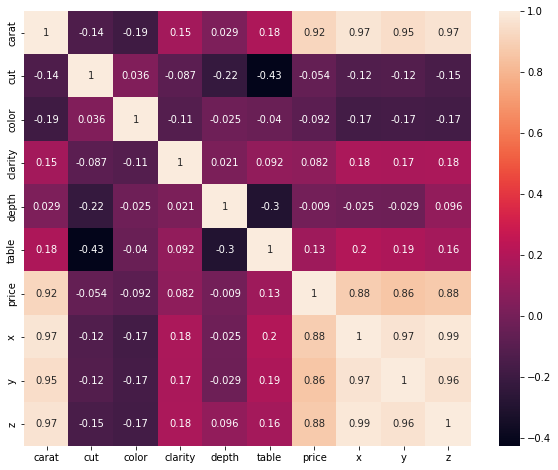

In [39]:
import seaborn as sns
plt.figure(figsize=(10,8))
  #sns.heatmap(corr_matrix, annot=True)
sns.heatmap(df.corr(),annot=True);

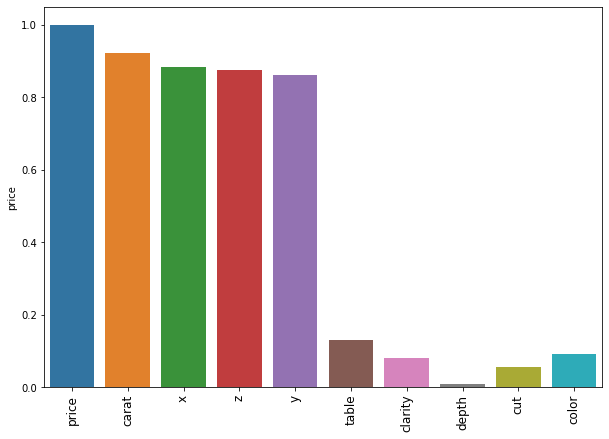

In [46]:
price_corr = df.corr() ["price"].sort_values(ascending=False).abs()

plt.figure(figsize=(10,7))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

###TARGET E FEATURE

In [75]:
# Definisco le Features e il Target 
X_ = df[["carat","x","z","y"]]
y = df['price']

In [76]:
#standardizzazione
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-1.00848986 -1.21321484 -1.13464323 -1.16140608]
 [ 0.97607467  0.93597412  1.12533825  0.8757661 ]
 [-1.05071464 -1.29347501 -1.1634328  -1.29199404]
 ...
 [-1.13516419 -1.44507755 -1.46572331 -1.43999373]
 [-0.83959075 -0.95459874 -0.86114228 -0.90023016]
 [-1.05071464 -1.25780382 -1.20661716 -1.21364126]]


In [77]:
X = standardized_data

##TRAIN TEST SPLIT

In [78]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

###FEATURE IMPORTANCES

In [79]:
regressor = RandomForestRegressor(random_state=667, n_estimators=100,max_depth=10)

In [102]:
#training the regressor
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=23)

Text(0.5, 0, 'Relative Importance')

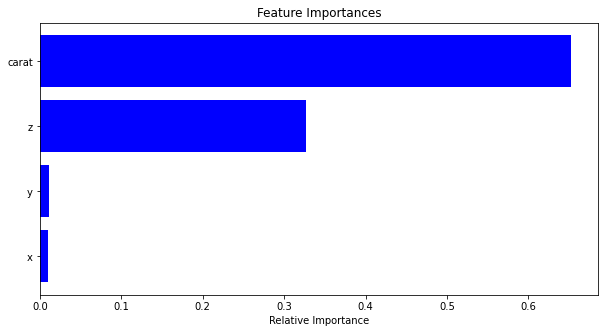

In [81]:
#Feature importance for Random Forest
features = X_.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

###KNN MODEL

In [82]:
### definisco già prima la funzione di evaluation

def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

In [83]:
### FITTING
from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor()
model = model.fit(X_train, y_train)

TRAIN SET
MAE:  664.1253459577567
R2:  0.9132874524827373


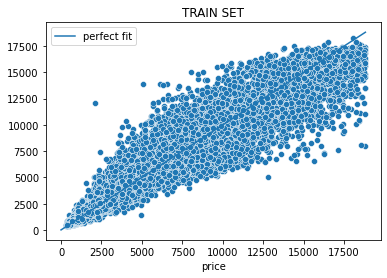

TEST SET
MAE:  836.6031515526031
R2:  0.8574887055505449


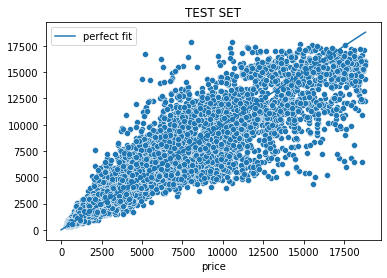

In [84]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

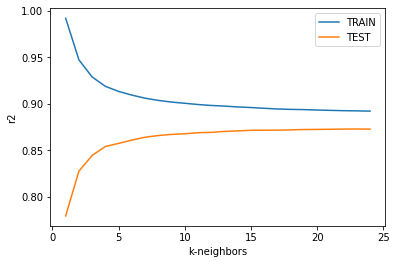

In [96]:
from sklearn.neighbors import KNeighborsRegressor

r2_train_list = list()
r2_test_list = list()
for k in range(1,25):
    model = KNeighborsRegressor(n_neighbors=k)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]

plt.plot(range(1,25), r2_train_list, label='TRAIN')
plt.plot(range(1,25), r2_test_list, label='TEST')
plt.xlabel('k-neighbors')
plt.ylabel('r2')
plt.legend()
plt.show()

In [97]:
train_r2_list = list()
test_r2_list = list()

k_list = range(1, 25)

for k in k_list:
    
    print('\nK:',k)
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train, y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


K: 1
TRAIN SET
MAE:  58.735714758657224
R2:  0.9918674129207615
TEST SET
MAE:  1035.5927699675576
R2:  0.779586533398356

K: 2
TRAIN SET
MAE:  510.4979805336688
R2:  0.9472180591957104
TEST SET
MAE:  920.5155646531747
R2:  0.8276511346249265

K: 3
TRAIN SET
MAE:  601.8538480213643
R2:  0.9288100246900113
TEST SET
MAE:  875.62425974561
R2:  0.8445101875012293

K: 4
TRAIN SET
MAE:  641.1810236376879
R2:  0.9187600221131349
TEST SET
MAE:  847.062277923683
R2:  0.8541306326279171

K: 5
TRAIN SET
MAE:  664.1253459577567
R2:  0.9132874524827373
TEST SET
MAE:  836.6031515526031
R2:  0.8574887055505449

K: 6
TRAIN SET
MAE:  679.7421373237105
R2:  0.9093343982562907
TEST SET
MAE:  827.5824450280652
R2:  0.861021383680809

K: 7
TRAIN SET
MAE:  692.1452502341068
R2:  0.9060090353433977
TEST SET
MAE:  816.7054247313015
R2:  0.8641149950683407

K: 8
TRAIN SET
MAE:  700.4054037277363
R2:  0.903634106235442
TEST SET
MAE:  811.048644368917
R2:  0.8659074930378141

K: 9
TRAIN SET
MAE:  707.95738153567

In [95]:
k=23
model = KNeighborsRegressor(n_neighbors=k)
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import r2_score

print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.8923981864791473
0.8729366327674674


In [101]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline


rfe = RFE(estimator=KNeighborsRegressor(23), n_features_to_select=5)
regressor = KNeighborsRegressor(23)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('regressor',regressor)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=KNeighborsRegressor(n_neighbors=23),
                     n_features_to_select=5)),
                ('regressor', KNeighborsRegressor(n_neighbors=23))])